# Daniel Alfeo
#### Lab Final Activity

In [1]:
import math
import astropy.units as u
from astropy.io import ascii
import numpy as np
from sklearn.neighbors import KernelDensity
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
%matplotlib inline
data = ascii.read('lab_final_data.txt')
data

Dist,Vel
int32,int32
15,1100
97,6700
32,2400
145,10700
50,3100
122,9900
58,4300
91,5300
120,9000


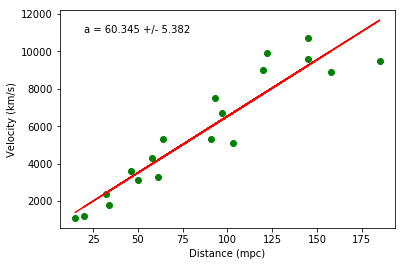

In [31]:
x = (data['Dist'])# mpc
y = data['Vel'] # km/s

def func(x, a, b):
    return a*x + b

popt1, pcov1 = curve_fit(func, x, y)

plt.plot(x, y, 'go')
plt.plot(x, np.polyval(popt1, x), 'r')
plt.text(20, 11000, r"a = {0:.3f} +/- {1:.3f}".format(popt1[0], pcov1[0,0]**0.5))
plt.xlabel("Distance (mpc)")
plt.ylabel("Velocity (km/s)")
plt.show()

In [33]:
H = popt1[0]

percent_error = (abs(70-H)/70)*100

print("Hubble's Constant is found to be", H ,"km/s/mpc")
print(percent_error, "% error from an accepted value of 70 km/s/mpc")

Hubble's Constant is found to be 60.3454855101 km/s/mpc
13.792163557 % error from an accepted value of 70 km/s/mpc


In [43]:
H_km = H / (3.086 * (10**19))
Age = 1/H_km
Age_years = Age / (3.154 * (10**7))

print("After converting the obtained Hubble's constant, we obtain a value of", H_km, "s^-1")
print("So the age of the universe in seconds is", Age, "Seconds")
print("That is",Age_years, "Years")
print("So the universe is roughly 16.214 Billion Years old")

After converting the obtained Hubble's constant, we obtain a value of 1.95545967304e-18 s^-1
So the age of the universe in seconds is 5.11388710177e+17 Seconds
That is 16213973055.7 Years
16.2139730557
So the universe is roughly 16.214 Billion Years old
